In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

C:\Users\jainh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

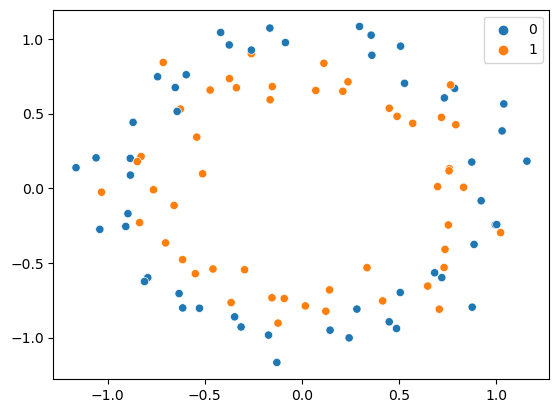

In [3]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

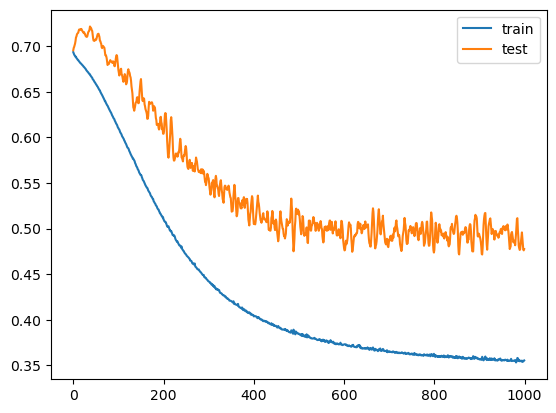

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 20s 2ms/step


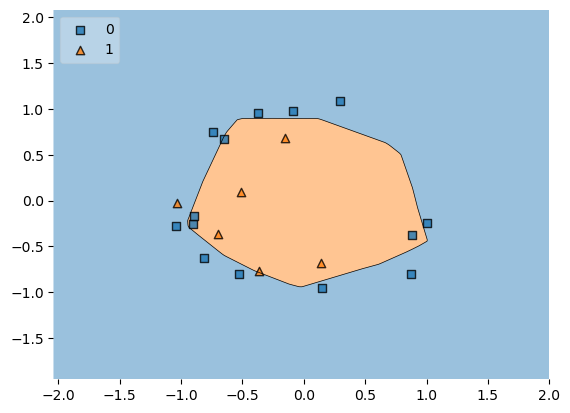

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [10]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks=callback)

Epoch 1/1000
3/3 [==============================] - 1s 120ms/step - loss: 0.6946 - accuracy: 0.4875 - val_loss: 0.7055 - val_accuracy: 0.3500
Epoch 2/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6918 - accuracy: 0.5875 - val_loss: 0.7055 - val_accuracy: 0.3500
Epoch 3/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.6908 - accuracy: 0.6000 - val_loss: 0.7078 - val_accuracy: 0.3500
Epoch 4/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6896 - accuracy: 0.5875 - val_loss: 0.7098 - val_accuracy: 0.3500
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6891 - accuracy: 0.5875 - val_loss: 0.7121 - val_accuracy: 0.3500
Epoch 6/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6884 - accuracy: 0.5875 - val_loss: 0.7135 - val_accuracy: 0.3500
Epoch 7/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6878 - accuracy: 0.5625 - val_loss: 0.7154 - val_accuracy: 0.3000
Epoch 8/1000

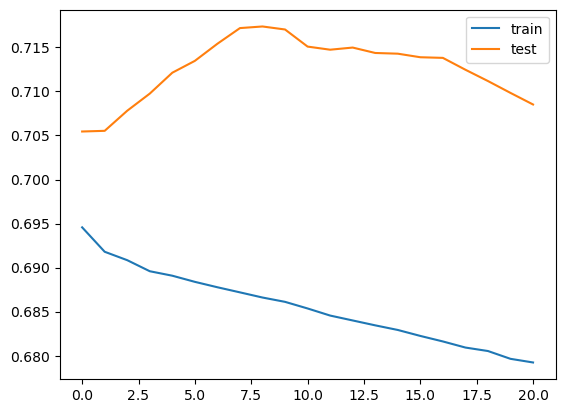

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 12s 1ms/step


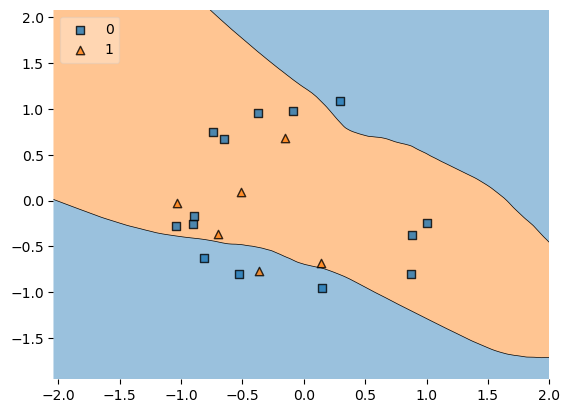

In [17]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()